In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
companies = pd.read_csv('/content/1000_Companies.csv')
companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = companies.iloc[:,:-1].values
y = companies.iloc[:,1].values
print(X)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]
[136897.8    151377.59   101145.55   118671.85    91391.77    99814.71
 147198.87   145530.06   148718.95   108679.17   110594.11    91790.61
 127320.38   135495.07   156547.42   122616.84   121597.55   145077.58
 114175.79   153514.11   113867.3    153773.43   122782.75   105751.03
  99281.34   139553.16   144135.98   127864.55   182645.56   153032.06
 115641.28   152701.92   129219.61   103057.49   157693.92    85047.44
 127056.21    51283.14    65947.93    82982.09   118546.05    84710.77
  96189.63   127382.3    154806.14   124153.04   115816.21   135426.92
  51743.15   116983.8    123327.9523 116183.1212 123739.6968 120128.2187
 117505.1933 114997.5096 121737.3896 131712.2998 114485.9303 131294.2049
 129410.636  12

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])


In [5]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'  # baaki columns waise ke waise raho
)

X = ct.fit_transform(X)
X = np.array(X)  # agar aapko ndarray chahiye

print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


<Axes: >

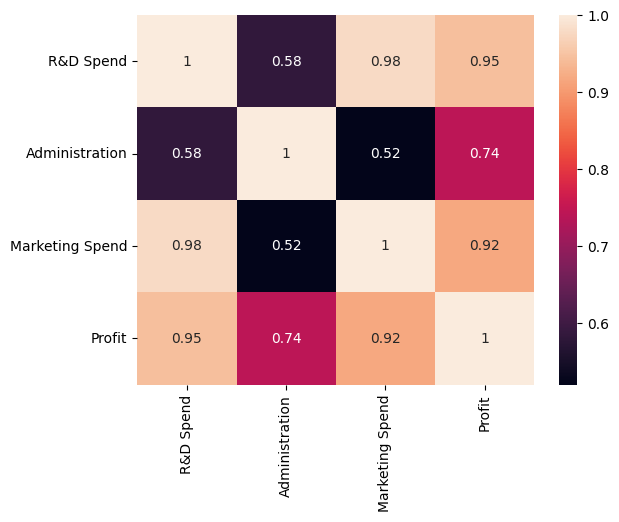

In [6]:
df_numeric= companies.drop(['State'],axis=1)
df_numeric.head()
sns.heatmap(df_numeric.corr(),annot=True)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [9]:
prediction = regressor.predict(X_test)


In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test,prediction)
print(score)

1.0


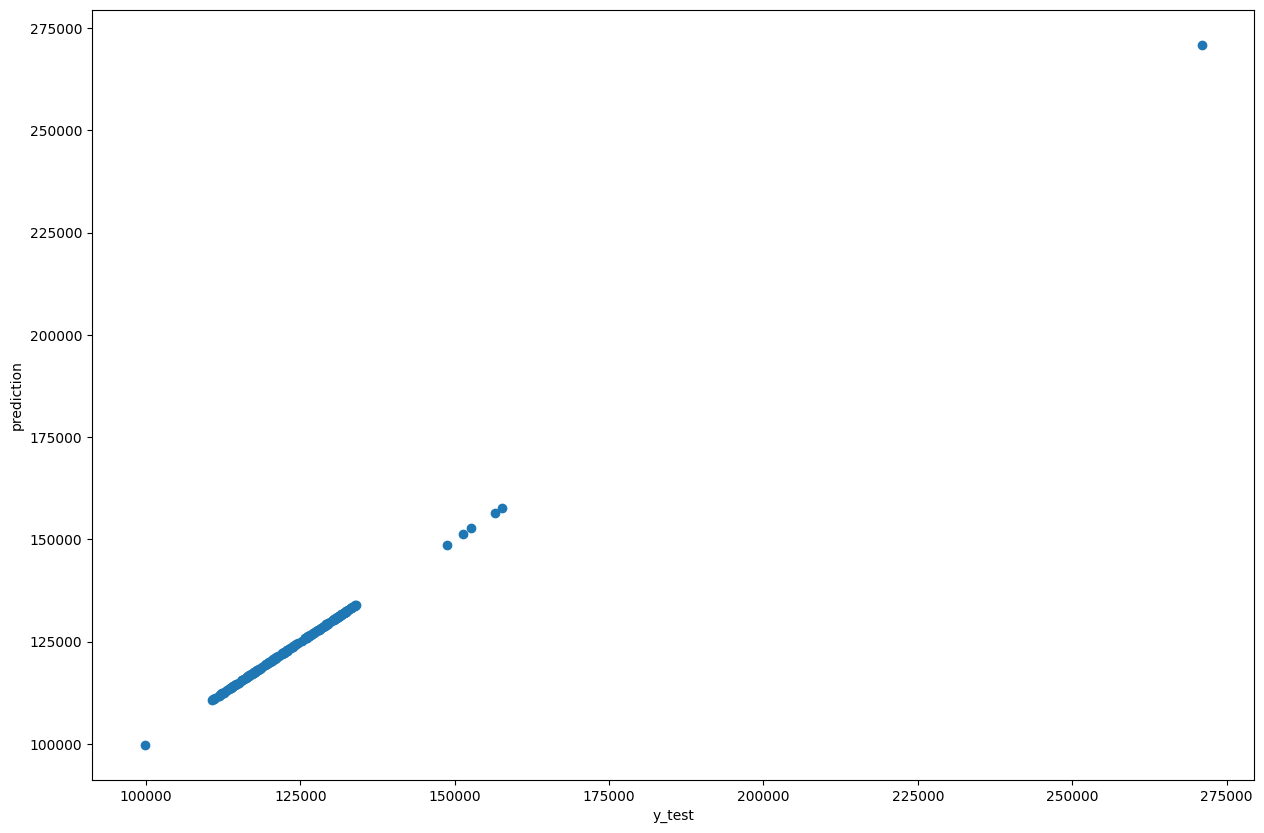

In [11]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()